In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv("bitcoin/submission.csv")

# Descriptive stats

In [3]:
df.head()

,submission,subreddit,author,created,retrieved,edited,pinned,archived,locked,removed,...,link_flair_text,upvote_ratio,score,gilded,total_awards_received,num_comments,num_crossposts,selftext,thumbnail,shortlink
0,rt6r1a,bitcoin,boom888boom,1640995385,1641140399,0,0,0,0,1,...,off topic,1.00,3,0,0,2,0,[removed],default,https://redd.it/rt6r1a
1,rt6s86,bitcoin,[deleted],1640995487,1641140399,0,0,0,1,1,...,altcoin,0.43,0,0,0,2,0,[removed],default,https://redd.it/rt6s86
2,rt6tub,bitcoin,FSdotorg,1640995629,1641140396,0,0,0,1,1,...,altcoin,0.33,0,0,0,2,0,[removed],default,https://redd.it/rt6tub
3,rt711v,bitcoin,Squigglywiggler,1640996258,1641140399,0,0,0,0,0,...,NaN,0.75,12,0,0,9,0,Anyone heard any news about this? Any opinions...,self,https://redd.it/rt711v
4,rt76mj,bitcoin,BuyTheDipper,1640996745,1641140399,0,0,0,0,1,...,repetitive,0.75,2,0,0,4,0,[removed],default,https://redd.it/rt76mj


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66576 entries, 0 to 66575
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   submission             66576 non-null  object 
 1   subreddit              66576 non-null  object 
 2   author                 66576 non-null  object 
 3   created                66576 non-null  int64  
 4   retrieved              66576 non-null  int64  
 5   edited                 66576 non-null  int64  
 6   pinned                 66576 non-null  int64  
 7   archived               66576 non-null  int64  
 8   locked                 66576 non-null  int64  
 9   removed                66576 non-null  int64  
 10  deleted                66576 non-null  int64  
 11  is_self                66576 non-null  int64  
 12  is_video               66576 non-null  int64  
 13  is_original_content    66576 non-null  int64  
 14  title                  66567 non-null  object 
 15  li

In [5]:
df.columns

Index(['submission', 'subreddit', 'author', 'created', 'retrieved', 'edited',
       'pinned', 'archived', 'locked', 'removed', 'deleted', 'is_self',
       'is_video', 'is_original_content', 'title', 'link_flair_text',
       'upvote_ratio', 'score', 'gilded', 'total_awards_received',
       'num_comments', 'num_crossposts', 'selftext', 'thumbnail', 'shortlink'],
      dtype='object')

| Column                  | Description                                       | Type   |
|-------------------------|---------------------------------------------------|--------|
| submission              | The id of the submission                          | string |
| subreddit               | The subreddit name                                | string |
| author                  | The redditor's username                           | string |
| created                 | Time the submission was created                   | number |
| retrieved               | Time the submission was retrieved                 | number |
| edited                  | Time the submission was modified                  | number |
| pinned                  | Whether or not the submission is pinned           | number |
| archived                | Whether or not the submission is archived         | number |
| locked                  | Whether or not the submission is locked           | number |
| removed                 | Whether or not the submission is mod removed      | number |
| deleted                 | Whether or not the submission is user deleted     | number |
| is_self                 | Whether or not the submission is a text           | number |
| is_video                | Whether or not the submission is a video          | number |
| is_original_content     | Whether or not the submission has original content| number |
| title                   | The title of the submission                        | string |
| link flair text         | The submission link flair's text content           | string |
| upvote_ratio            | The percentage of upvotes from all votes           | number |
| score                   | The number of upvotes for the submission          | number |
| gilded                  | The number of gilded awards on the submission     | number |
| total_awards_received   | The number of awards on the submission            | number |
| num comments            | The number of comments on the submission          | number |
| num_crossposts          | The number of crossposts on the submission        | number |
| selftext                | The submission selftext on text posts             | string |
| thumbnail               | The submission thumbnail on image posts            | string |
| shortlink               | The submission short URL                          | string |


selftext

In [6]:
df["selftext"].value_counts().head(10)

selftext
[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [7]:
# Pre-processing
df = df.dropna(subset = "selftext")
df = df[ df["removed"] != 1]

# convert to datetime
df["created_utc"] = pd.to_datetime(df["created"], unit="s")

# Set 'datetime' column as the index
df.set_index('created_utc', inplace=True)

In [8]:
df.describe()

,created,retrieved,edited,pinned,archived,locked,removed,deleted,is_self,is_video,is_original_content,upvote_ratio,score,gilded,total_awards_received,num_comments,num_crossposts
count,1.605000e+04,1.605000e+04,1.605000e+04,16050.0,16050.0,16050.000000,16050.0,16050.000000,16050.000000,16050.000000,16050.0,16050.000000,16050.00000,16050.000000,16050.000000,16050.000000,16050.000000
mean,1.655133e+09,1.655188e+09,1.625322e+08,0.0,0.0,0.000312,0.0,0.000249,0.992399,0.000312,0.0,0.672204,23.42567,0.007290,0.154206,28.525171,0.064237
std,9.495426e+06,9.501511e+06,4.924072e+08,0.0,0.0,0.017648,0.0,0.015785,0.086856,0.017648,0.0,0.213842,87.61678,0.092104,0.885118,66.247822,0.350246
min,1.640996e+09,1.641140e+09,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.040000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.646612e+09,1.646657e+09,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.500000,0.00000,0.000000,0.000000,5.000000,0.000000
50%,1.654359e+09,1.654405e+09,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.690000,3.00000,0.000000,0.000000,11.000000,0.000000
75%,1.663212e+09,1.663261e+09,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.840000,11.00000,0.000000,0.000000,25.000000,0.000000
max,1.672530e+09,1.672537e+09,1.672529e+09,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,2450.00000,3.000000,35.000000,1884.000000,13.000000


<Axes: xlabel='number of tokens in selftext', ylabel='frequency'>

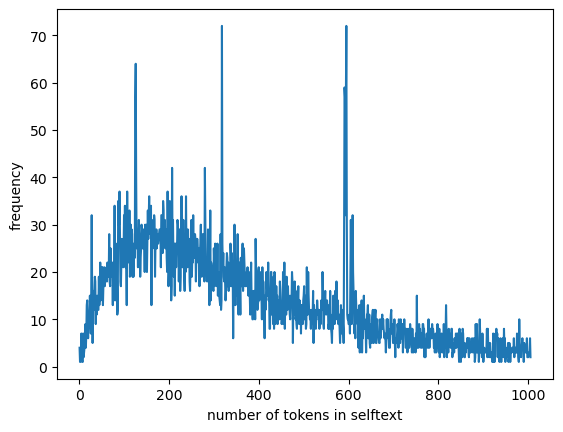

In [28]:
# TODO: distribution of length of selftext
df["selftext"].apply(len).value_counts().sort_index().head(1000).plot(xlabel="number of tokens in selftext", ylabel="frequency")

In [54]:
sample_text = df["selftext"].sample(1).values[0]
print(sample_text)

    I'll start off by saying bitcoin is very interesting. I own a good amount of it. And I love the movement. I do have some criticisms. Just because I own some and like it and so do a lot of other people doesn't mean its perfect and I like to go through things with a fine tooth comb to find flaws.
How do we acquire bitcoin in a cbdc world when everything is tracked?
    Its no longer a conspiracy that the world is moving to cbdc with a digital ID that is tied to some sort of social scoring system like esg. In this system I'm sure in order to partake in society you would need this new ID in order to use this new cbdc which all businesses would be ordered to use and probably wouldn't be allowed to use anything else. Since bitcoin is easily traceable I don't see how it would survive governments who will trace down these transactions and possibly jail people and close businesses for using it. Now this is a what if but if the government wants us to use cbdc only then I'm sure they will use

title

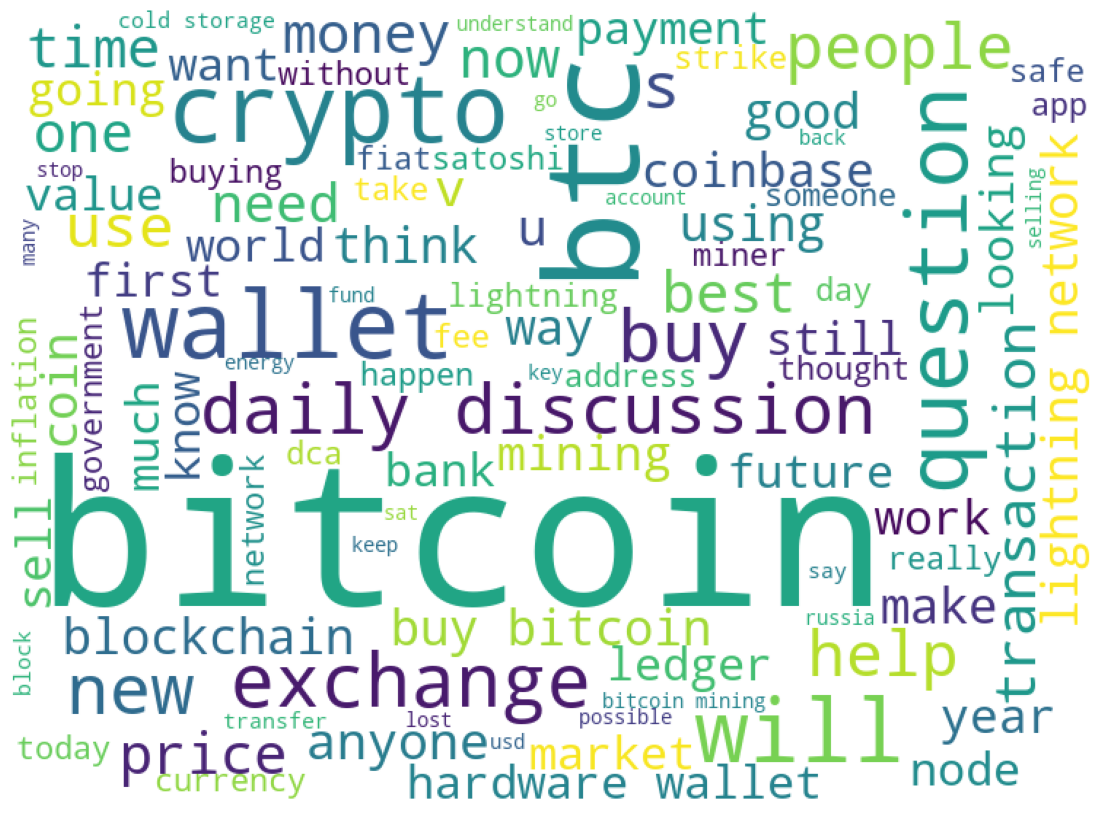

In [9]:
# https://github.com/britt-allen/classifying_reddit_posts/blob/master/notebooks/project_3_data_cleaning_and_eda.ipynb

text = ' '
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for x in df["title"]: 
    # typecaste each val to string 
    x = str(x) 

    # split the value 
    values = x.split() 
        
    # Converts each token into lowercase 
    for i in range(len(values)): 
        values[i] = values[i].lower() 
            
    for words in values: 
        text = text + words + ' '


wc = WordCloud(max_words= 100,
                    width = 744, 
                    height = 544,
                    background_color ='white',
                    stopwords=stopwords, 
                    contour_width=3, 
                    contour_color='steelblue',
                    min_font_size = 10).generate(text) 

# plot the WordCloud image                        
plt.figure(figsize = (14, 14)) 
plt.imshow(wc) 
plt.axis("off")
plt.savefig('images/reddit_wordcloud.png')

num_comments

Text(0.5, 1.0, 'Number of comments per submission')

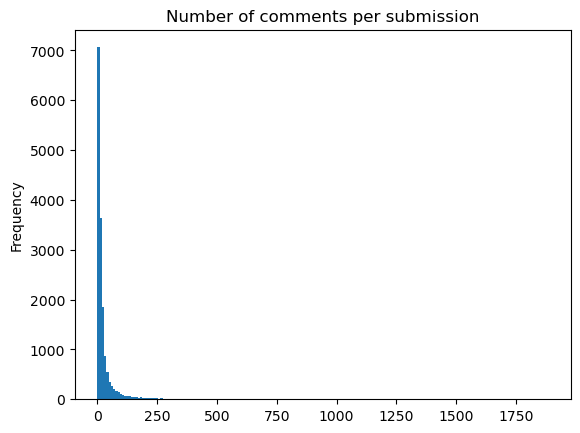

In [40]:
df["num_comments"].plot(kind="hist", bins=200)
plt.title("Number of comments per submission")

We see that most posts are unatractive; we assume that those posts have no influence on the btc price. Let's filter all posts below 100 comments.

Text(0.5, 1.0, 'Number of comments per submission (> 100)')

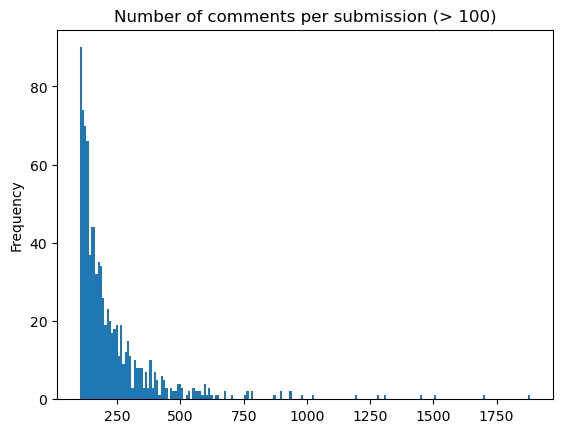

In [42]:
mask = df["num_comments"] > 100
df.loc[mask,"num_comments"].plot(kind="hist", bins=200)
plt.title("Number of comments per submission (> 100)")

Author

In [22]:
unique_users = df["author"].unique()
# Count nb of posts per user
posts_per_user = df["author"].value_counts()

In [23]:
posts_per_user.sort_values(ascending=False, inplace=True)

<Axes: >

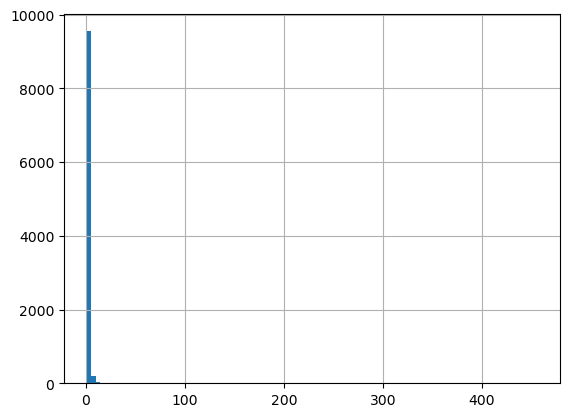

In [12]:
posts_per_user.hist(bins=100)

Text(0.5, 1.0, 'Top 10 authors')

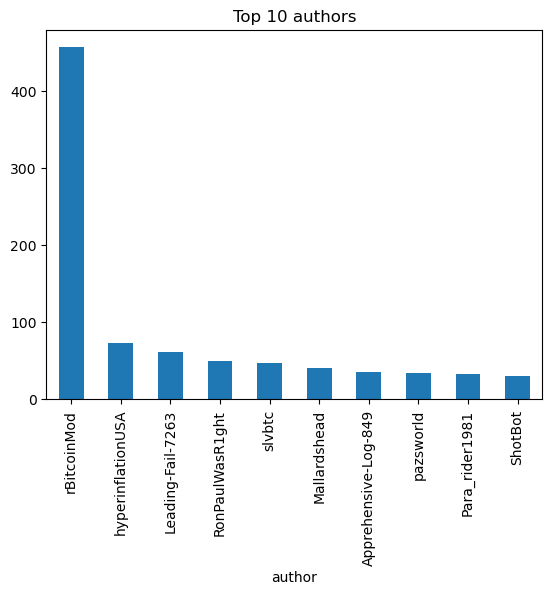

In [43]:
df["author"].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 authors")

Text(0.5, 1.0, 'Top 10 authors without rBitcoinMod')

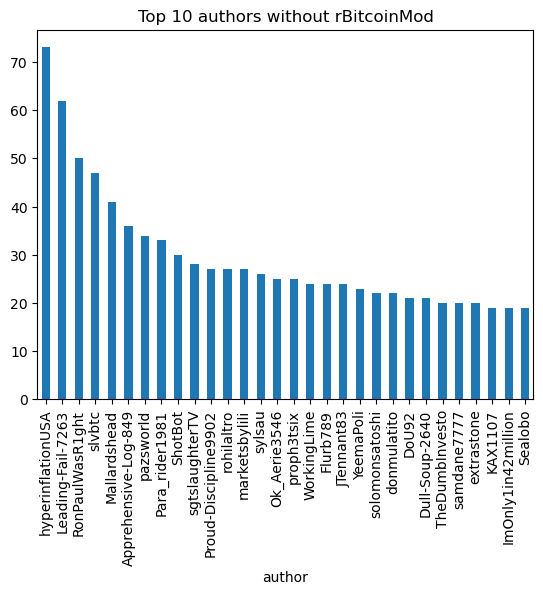

In [46]:
# We see that the first author is rBitcoinMod. This is a bot and the text it generates is not relevant as we don't have access to the comments. Let's filter him as well
mask = df["author"] != "rBitcoinMod"
df[mask]["author"].value_counts().head(30).plot(kind='bar')
plt.title("Top 10 authors without rBitcoinMod")

([], [])

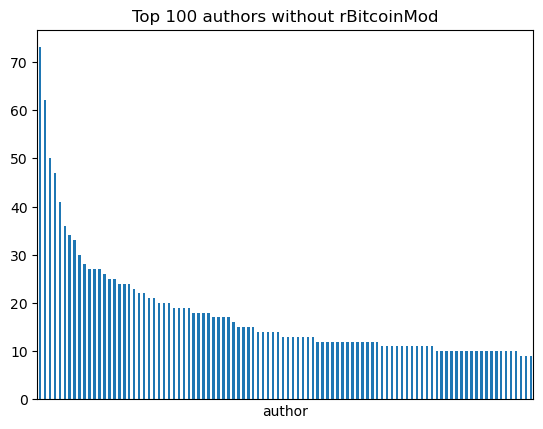

In [47]:
df[mask]["author"].value_counts().head(100).plot(kind='bar')
plt.title("Top 100 authors without rBitcoinMod")
# Remove x-axis ticks
plt.xticks([])

# Transformers pipeline

In [13]:
from transformers import pipeline, AutoTokenizer

MODEL = "mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis"
sentiment_task = pipeline("sentiment-analysis", model=MODEL, tokenizer=MODEL)


In [26]:
def remove_special_chars(text):
    return ''.join(e for e in text if e.isalnum() or e.isspace())

In [30]:
sentiments_label = []
sentiments_score = []
for txt in tqdm(df["selftext"].values):
    txt = remove_special_chars(txt)
    try:
        sentiment = sentiment_task(txt)
        sentiments_label.append(sentiment[0]["label"])
        sentiments_score.append(sentiment[0]["score"])
    except Exception as e:
        sentiments_label.append("N/A")
        sentiments_score.append(0)

100%|██████████| 16050/16050 [05:26<00:00, 49.20it/s]


In [59]:
df["sentiment_label"] = sentiments_label
df["sentiment_score"] = sentiments_score

<Axes: xlabel='sentiment_label'>

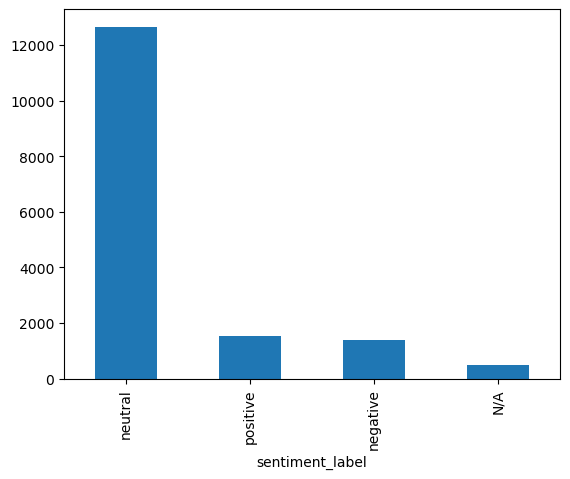

In [60]:
df["sentiment_label"].value_counts().plot(kind="bar")

In [ ]:
df[mq]

In [38]:
# convert to datetime
df["created_utc"] = pd.to_datetime(df["created"], unit="s")

In [69]:
lag = "24H"

mask_positive = df["sentiment_label"] == "positive"
mask_negative = df["sentiment_label"] == "negative"
mask_both = mask_positive | mask_negative

df["positive_score"] = 0
df.loc[mask_positive, 'positive_score'] = df[mask_positive]["sentiment_score"].values
df["negative_score"] = 0
df.loc[mask_negative, 'negative_score'] = df[mask_negative]["sentiment_score"].values


df["rolling_positive_score"] = df["positive_score"].rolling(lag).sum()
df["rolling_negative_score"] = df["negative_score"].rolling(lag).sum()

df["alpha"] = (df["rolling_positive_score"] - df["rolling_negative_score"]) / (df["rolling_positive_score"] + df["rolling_negative_score"] + 1e-4)

/tmp/ipykernel_4046730/963834529.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.9988237  0.99891353 0.99970275 ... 0.99892348 0.99837887 0.98968303]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[mask_positive, 'positive_score'] = df[mask_positive]["sentiment_score"].values
/tmp/ipykernel_4046730/963834529.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.79209077 0.99551231 0.57348925 ... 0.994331   0.7332291  0.94990015]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[mask_negative, 'negative_score'] = df[mask_negative]["sentiment_score"].values
/tmp/ipykernel_4046730/963834529.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df["rolling_positive_score"

<Axes: >

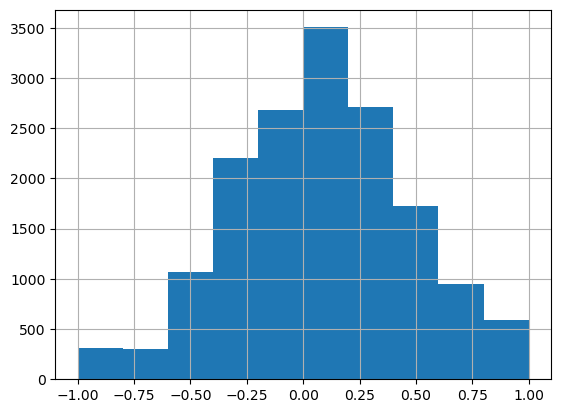

In [70]:
df["alpha"].hist()

<Axes: xlabel='created_utc'>

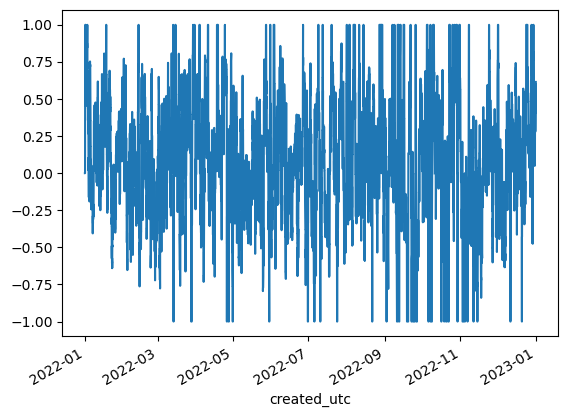

In [71]:
df["alpha"].plot()


In [72]:
df

,submission,subreddit,author,created,retrieved,edited,pinned,archived,locked,removed,...,thumbnail,shortlink,sentiment_label,sentiment_score,positive_score,f,negative_score,rolling_positive_score,rolling_negative_score,alpha
created_utc,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:17:38,rt711v,bitcoin,Squigglywiggler,1640996258,1641140399,0,0,0,0,0,...,self,https://redd.it/rt711v,neutral,0.999877,0.0,NaN,0.0,0.000000,0.000000,0.000000
2022-01-01 00:55:55,rt7qa5,bitcoin,SilverAndAlgorand,1640998555,1641140399,0,0,0,0,0,...,self,https://redd.it/rt7qa5,neutral,0.999750,0.0,NaN,0.0,0.000000,0.000000,0.000000
2022-01-01 01:06:06,rt7x3t,bitcoin,Geoknysis,1640999166,1641140399,0,0,0,0,0,...,self,https://redd.it/rt7x3t,neutral,0.999862,0.0,NaN,0.0,0.000000,0.000000,0.000000
2022-01-01 01:20:37,rt86pj,bitcoin,Mannycass,1641000037,1641140399,0,0,0,0,0,...,self,https://redd.it/rt86pj,neutral,0.999772,0.0,NaN,0.0,0.000000,0.000000,0.000000
2022-01-01 03:07:40,rta3p4,bitcoin,Still_Hat6758,1641006460,1641140399,0,0,0,0,0,...,self,https://redd.it/rta3p4,neutral,0.999276,0.0,NaN,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 21:40:39,1004e15,bitcoin,Physical_Proposal_80,1672522839,1672536965,0,0,0,0,0,...,self,https://redd.it/1004e15,neutral,0.999853,0.0,NaN,0.0,3.985126,1.683129,0.406114
2022-12-31 21:58:14,1004qpv,bitcoin,euodeioserbrasileiro,1672523894,1672536965,0,0,0,0,0,...,self,https://redd.it/1004qpv,neutral,0.999852,0.0,NaN,0.0,3.985126,1.683129,0.406114
2022-12-31 22:36:23,1005i5m,bitcoin,bamboochar,1672526183,1672536965,1672526489,0,0,0,0,...,self,https://redd.it/1005i5m,neutral,0.999894,0.0,NaN,0.0,3.985126,1.683129,0.406114


In [73]:
df.to_csv("bitcoin/sentiment.csv")